# Informações sobre a base de dados

* Nome do dataset: adult.csv

* Descrição: O nome da base de dados é adult.csv onde será realizada a classificação se determinado individuo recebe 
    <=50K ou >50K, ou seja será realizada a Avaliação de Rendas

* Link fonte de dados: https://www.kaggle.com/uciml/adult-census-income?select=adult.csv

# Dicionario de dados com o nome de cada campo e os tipos dos dados
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importando as bases de dados

In [2]:
renda = pd.read_csv("base/adult.csv")

## Exibindo os dados do data set

In [3]:
renda.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Listando o nome da colunas do dataset renda

In [4]:
renda.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Renomeando as colunas
* As colunas do dataset serão Renomeadas para facilitar a analise e processamento dos dados

In [5]:
def renomear_colunas (data):
    
    # Cria um dicionario com o nome das colunas
    dic_colunas = {'age':'Idade', 'workclass':'Classe Trabalho', 'fnlwgt':'Peso Final', 'education':'Educacao', 
                   'education.num':'Num Educacao', 'marital.status':'Estado Civil','occupation':'Ocupacao',
                   'relationship':'Relacao', 'race':'Raca', 'sex':'Sexo', 'capital.gain':'Ganho Capital',
                   'capital.loss':'Perda Capital', 'hours.per.week':'Horas Semana', 'native.country': 'Pais Nativo',
                   'income': 'Renda'}
    print('dic_colunas: ', dic_colunas)
    
    #Renomeando as colunas baseado no dicionario
    data.rename(dic_colunas, axis=1, inplace=True) 
    
    return data

In [6]:
renda = renomear_colunas(renda)

dic_colunas:  {'age': 'Idade', 'workclass': 'Classe Trabalho', 'fnlwgt': 'Peso Final', 'education': 'Educacao', 'education.num': 'Num Educacao', 'marital.status': 'Estado Civil', 'occupation': 'Ocupacao', 'relationship': 'Relacao', 'race': 'Raca', 'sex': 'Sexo', 'capital.gain': 'Ganho Capital', 'capital.loss': 'Perda Capital', 'hours.per.week': 'Horas Semana', 'native.country': 'Pais Nativo', 'income': 'Renda'}


## Exibe o data set com as colunas renomeadas

In [7]:
renda.head()

,Idade,Classe Trabalho,Peso Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho Capital,Perda Capital,Horas Semana,Pais Nativo,Renda
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Dimensão do data set

In [8]:
renda.shape

(32561, 15)

## Dados Estatisticos

In [9]:
renda.describe()

,Idade,Peso Final,Num Educacao,Ganho Capital,Perda Capital,Horas Semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Verificando o tipos dos dados do data set

In [10]:
renda.dtypes

Idade               int64
Classe Trabalho    object
Peso Final          int64
Educacao           object
Num Educacao        int64
Estado Civil       object
Ocupacao           object
Relacao            object
Raca               object
Sexo               object
Ganho Capital       int64
Perda Capital       int64
Horas Semana        int64
Pais Nativo        object
Renda              object
dtype: object

# Processamento e Tratamento dos dados

## Substituindo os espaços em branco por Nan

* Faz se necessário o código abaixo porque na base, os dados ausentes estão com interrogação(?), e o comando isnull().sum() não
consegue fazer a contagem, então executamos o código abaixo para substituir os "?" por nan

In [11]:
def tratamento_espaco_branco (data):    
    #Elimina os espaços em branco e mantem apenas "?"
    data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    #Substitui a "?" por np.nan
    data = data.replace("?",np.nan)
    
    return data

In [12]:
renda = tratamento_espaco_branco(renda)

## Verificando dados ausentes
* Podemos perceber pelo comando abaixo que temos dados ausentes nos campos "Classe Trabalho", "Ocupacao" e "Pais Nativo"

In [13]:
renda.isnull().sum()

Idade                 0
Classe Trabalho    1836
Peso Final            0
Educacao              0
Num Educacao          0
Estado Civil          0
Ocupacao           1843
Relacao               0
Raca                  0
Sexo                  0
Ganho Capital         0
Perda Capital         0
Horas Semana          0
Pais Nativo         583
Renda                 0
dtype: int64

## Tratamento de dados ausentes
* A função abaixo substitui os dados ausentes pela moda

In [14]:
def tratamento_dados_ausentes(data):
    
    # Coluna Classe Trabalho
    modaClasseTrabalho = data['Classe Trabalho'].mode()[0]
    # Substitui os dados faltantes dessa coluna pela moda
    data['Classe Trabalho'].fillna(modaClasseTrabalho, inplace=True)
    
    # Coluna Ocupacao
    modaOcupacao = data['Ocupacao'].mode()[0]
    # Substitui os dados faltantes dessa coluna pela moda
    data['Ocupacao'].fillna(modaOcupacao, inplace=True)
    
    # Coluna Pais Nativo
    modaPaisNativo = data['Pais Nativo'].mode()[0]
    # Substitui os dados faltantes dessa coluna pela moda
    data['Pais Nativo'].fillna(modaPaisNativo, inplace=True)
    
    return data

In [15]:
renda = tratamento_dados_ausentes(renda)

## Verificando se ainda temos dados ausentes
* Podemos perceber já não temos mais dados ausentes no dataset

In [16]:
renda.isnull().sum()

Idade              0
Classe Trabalho    0
Peso Final         0
Educacao           0
Num Educacao       0
Estado Civil       0
Ocupacao           0
Relacao            0
Raca               0
Sexo               0
Ganho Capital      0
Perda Capital      0
Horas Semana       0
Pais Nativo        0
Renda              0
dtype: int64

# Tratamentos de Outiliers

In [17]:
renda.describe()

,Idade,Peso Final,Num Educacao,Ganho Capital,Perda Capital,Horas Semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* Analisando o comando acima podemos observar que alguns outliers:
* Idade - o minimo é 17 e o maximo 90, precisamos analisar o porque dessa diferença de idade, pode ser outilier
* Ganho Capital: o minimo é 0 e o maximo é 99999, pode ser outlier
* Horas Semanas: o minimo é 1 e o maximo 99, pode ser outlier

## Traçando um grafico Boxplot para essas três variaveis

* Os graficos boxplot serão traçados usando a bibliotecas seaborn

### Mudando o estilo dos graficos

In [18]:
sns.set(style="whitegrid", color_codes=True)

### Grafico para a variavel Idade

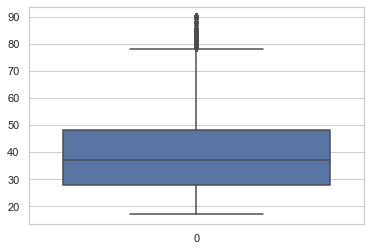

In [19]:
sns.boxplot(data=renda['Idade']);

### Grafico para a variavel Horas Semana

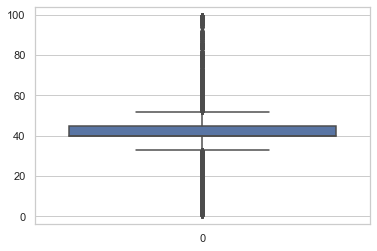

In [20]:
sns.boxplot(data=renda['Horas Semana']);

### Grafico para a variavel Ganho Capital

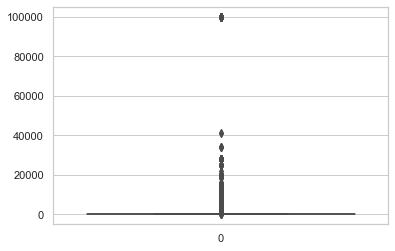

In [21]:
sns.boxplot(data=renda['Ganho Capital']);

* Para a remoção de outiliers será utilizado o metodos estatitistico e analise univariada dos dados, com calculo de duas vezes o desvio padrão porque os dados estão muito espaçados podemos verificar isso pelos boxplot demonstrados anteriormente

* A função abaixo será responsavel pela remoção dos outliers, no inicio da função é calculada a média e o desvio padrão, o valor de corte é usado como métrica 2 vezes o desvio padrão porque os dados estão muito espaçados, em seguida é feito a identificação do valor minimo e maximo 

In [22]:
def remover_outlier_metodo_estatistico(data, coluna):
    #Calcula a Media
    valor_media = np.mean(data[coluna])
    print("valor_media: " + str(valor_media))
    
    #Calcula o desvio padrão
    valor_desvio = np.std(data[coluna])
    print("valor_desvio: " + str(valor_desvio))
    
    #Valor Corte
    valor_corte = valor_desvio * 2
    print("valor_corte: " + str(valor_corte))
    
    #Valor de Ponto Minimo
    valor_ponto_minimo = valor_media - valor_corte
    print("valor_ponto_minimo: " + str(valor_ponto_minimo))
    
    #Valor de Ponto Maximo
    valor_ponto_maximo = valor_media + valor_corte
    print("valor_ponto_maximo: " + str(valor_ponto_maximo))
    
    #Indices a serem excluidos    
    idx = data[(data[coluna] < valor_ponto_minimo) | (data[coluna] > valor_ponto_maximo)].index
    print("idx: " + str(idx))
    
    # removendo os dados da coluna baseado no indice
    data.drop(idx , inplace=True) 
    
    #Redifinindo os indices após a exclusão
    data.reset_index(inplace=True, drop=True)
    
    return data

## Dimensão do dataset antes da remoção dos outliers

In [23]:
renda.shape

(32561, 15)

## Remove os outliers da coluna Idade

In [24]:
renda = remover_outlier_metodo_estatistico(renda,'Idade')

valor_media: 38.58164675532078
valor_desvio: 13.640223092304277
valor_corte: 27.280446184608554
valor_ponto_minimo: 11.30120057071223
valor_ponto_maximo: 65.86209293992934
idx: Int64Index([    0,     1,     2,     7,     8,    44,    46,    47,    48,
               49,
            ...
            32364, 32366, 32451, 32468, 32473, 32500, 32506, 32528, 32541,
            32544],
           dtype='int64', length=1158)


## Grafico BoxPlot da coluna "Idade"

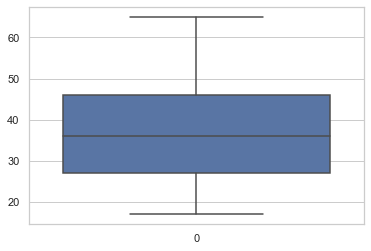

In [25]:
sns.boxplot(data=renda['Idade']);

## Removendo outilier da coluna Horas Semana

In [26]:
renda = remover_outlier_metodo_estatistico(renda,'Horas Semana')

valor_media: 40.85810272903863
valor_desvio: 11.961142633040563
valor_corte: 23.922285266081126
valor_ponto_minimo: 16.935817462957502
valor_ponto_maximo: 64.78038799511975
idx: Int64Index([   11,    24,    39,    41,    50,    52,    55,    64,    66,
               67,
            ...
            31259, 31267, 31296, 31322, 31323, 31329, 31347, 31372, 31378,
            31396],
           dtype='int64', length=2314)


## Grafico BoxPlot da coluna "Horas Semana"

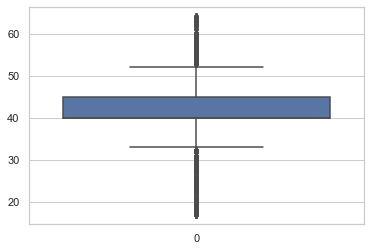

In [27]:
sns.boxplot(data=renda['Horas Semana']);

## Removendo outilier da coluna Ganho Capital

In [28]:
renda = remover_outlier_metodo_estatistico(renda,'Ganho Capital')

valor_media: 1010.4806971707518
valor_desvio: 7010.882365854536
valor_corte: 14021.764731709072
valor_ponto_minimo: -13011.284034538321
valor_ponto_maximo: 15032.245428879824
idx: Int64Index([1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358,
            ...
            1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528],
           dtype='int64', length=180)


## Grafico BoxPlot da coluna "Ganho Capital"

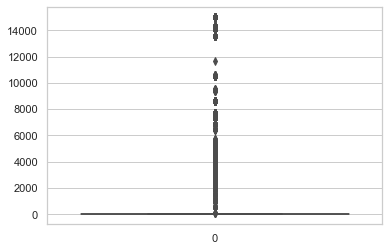

In [29]:
sns.boxplot(data=renda['Ganho Capital']);

## Dimensão do dataset após da remoção dos outliers¶

In [30]:
renda.shape

(28909, 15)